## Name:Saurabh Shashikant kore 
## Batch -SEPT BATCH P4
## TASK 3 - IRIS FLOWER CLASSIFICATION

### Problem Statement: 
The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

###   Import Modules 

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

### Loding the Dataset 

In [2]:
df = pd.read_csv("IRIS.csv")
#  to display the some head rows of dataset 
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
# to display the how many rows and columns are available 
df.shape

(150, 5)

In [4]:
# to display the size of the dataset
df.size

750

In [5]:
# to displa(y the descibe the stastics like mean std etc 
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# to display the Datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Preprocessing the Dataset 

In [7]:
# checking for the missing null values 
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
# to display the no of species on each class
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

## Exploratory data analysis

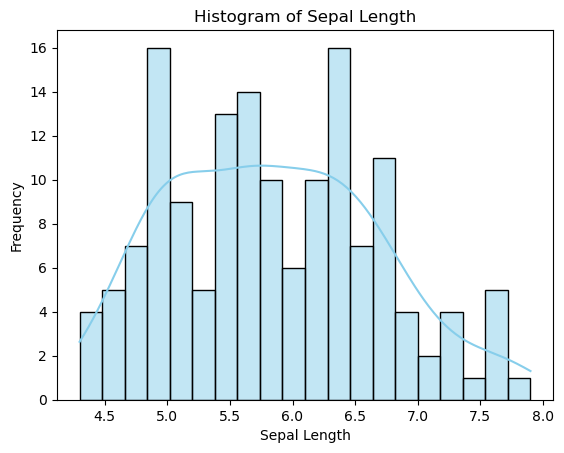

In [9]:
sns.histplot(data=df, x='sepal_length', bins=20, color='skyblue', kde=True)
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()

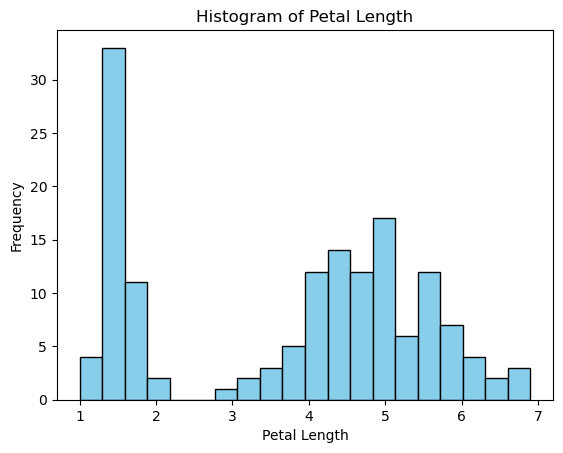

In [10]:

plt.hist(df['petal_length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Length')
plt.show()

<Axes: >

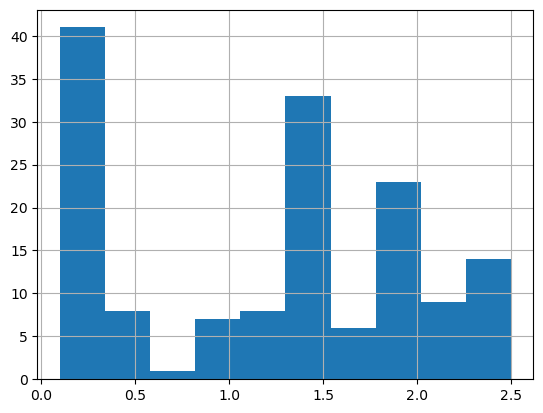

In [11]:
df['petal_width'].hist()

<Axes: >

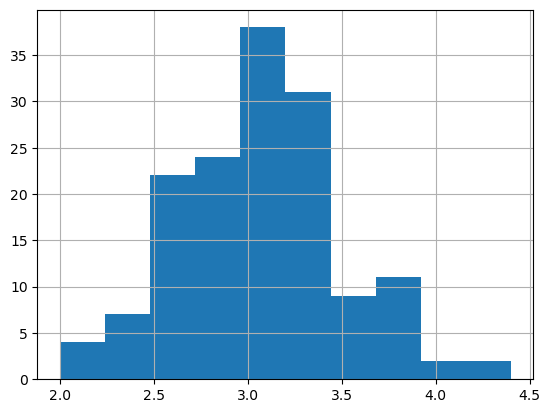

In [12]:
df['sepal_width'].hist()

In [13]:
# to display the scatter plot 
colors = ['red', 'green', 'blue']  

species = ['Iris-setosa','Iris-versicolor'   , 'Iris-virginica ' ]

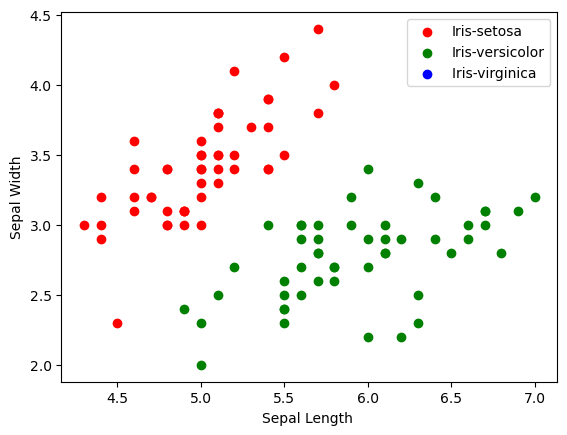

In [14]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])
    plt.xlabel("Sepal Length ")
    plt.ylabel("Sepal Width")
    plt.legend()

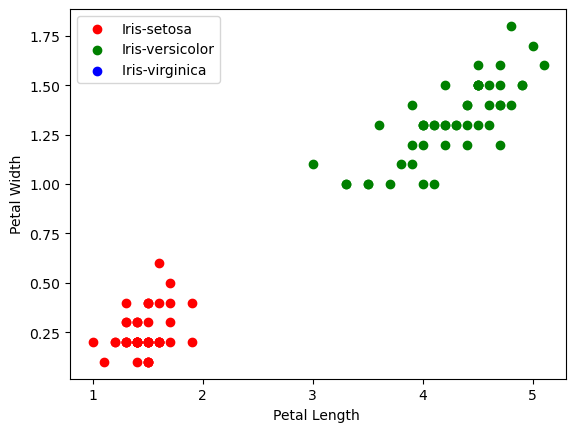

In [15]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])
    plt.xlabel("Petal Length ")
    plt.ylabel("Petal Width")
    plt.legend()

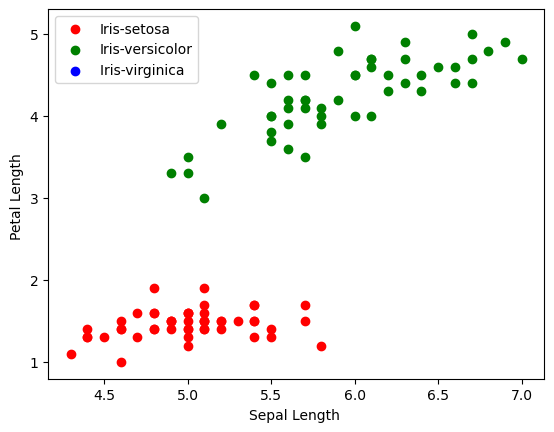

In [16]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])
    plt.xlabel("Sepal Length ")
    plt.ylabel("Petal Length ")
    plt.legend()

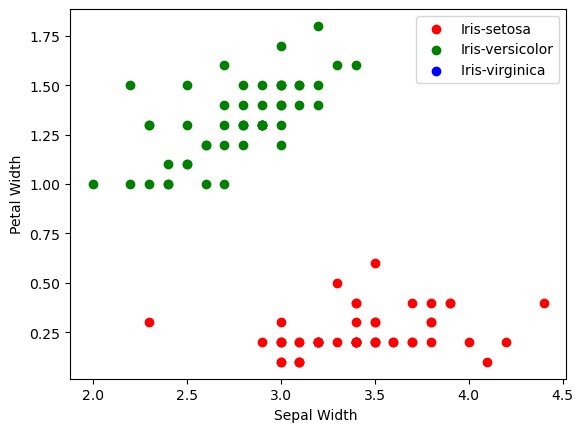

In [17]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])
    plt.xlabel("Sepal Width ")
    plt.ylabel("Petal Width")
    plt.legend()

## coorelation Matrix 

In [18]:
df.corr(numeric_only= True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

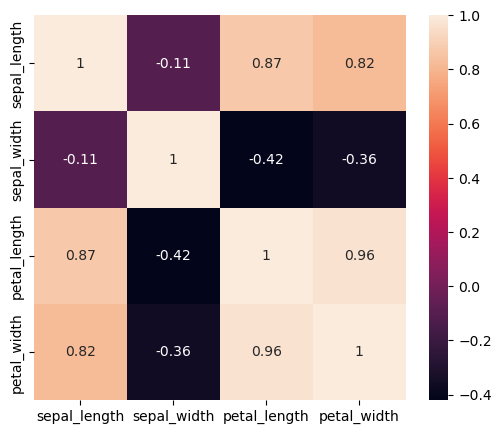

In [19]:
corr = df.corr(numeric_only = True)
fig , ax = plt.subplots(figsize=( 6, 5 ))
sns .heatmap(corr , annot = True , ax = ax )


### Label Encoder 

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Training 

In [23]:
from sklearn.model_selection import train_test_split
# Split the dataset train and test
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train , y_test = train_test_split(X , Y, test_size = 0.30 ,random_state=42)

In [24]:
# logestic regreession 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
# Model Training 
model.fit(x_train, y_train)


LogisticRegression()

In [26]:
print("Accuracy of the model :", model.score(x_test , y_test )*100)

Accuracy of the model : 100.0


In [27]:
# knn - K nearest neighbours 
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [28]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [29]:
print("Accuracy of the model is :", model.score(x_test , y_test )*100)

Accuracy of the model is : 100.0


In [30]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [31]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [32]:
print("Accuracy of the model is :", model.score(x_test , y_test )*100)

Accuracy of the model is : 100.0
